<a href="https://colab.research.google.com/github/mtsilimos/Source-code/blob/main/Section_6_googlecolab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
with open('/content/drive/My Drive/swiss.txt', 'r') as f:
    file = f.read()
print(file)

Switzerland needs to invest CHF13 billion a year ($14 billion), the equivalent of 2% of gross domestic product (GDP), 
over the next three decades to meet its 2050 carbon-zero goal, a study has found.
External link by the Swiss Bankers Association (SBA) and the Boston Consulting Group (BCG), published on Thursday, 
calculated that CHF387.2 billion would have to be invested over the next 30 years to meet this objective.
'The bulk of this investment is needed in the sectors of light road traffic, buildings and heavy road traffic,' the report said.
BCG Managing Director Christian Schmid said the required spending would equate to roughly double Switzerland's current military outlays.



In [ ]:
import nltk
nltk.download('punkt_tab')
from nltk import word_tokenize
from nltk import sent_tokenize
from nltk import pos_tag



sentences = sent_tokenize(file)
sentences


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


['Switzerland needs to invest CHF13 billion a year ($14 billion), the equivalent of 2% of gross domestic product (GDP), \nover the next three decades to meet its 2050 carbon-zero goal, a study has found.',
 'External link by the Swiss Bankers Association (SBA) and the Boston Consulting Group (BCG), published on Thursday, \ncalculated that CHF387.2 billion would have to be invested over the next 30 years to meet this objective.',
 "'The bulk of this investment is needed in the sectors of light road traffic, buildings and heavy road traffic,' the report said.",
 "BCG Managing Director Christian Schmid said the required spending would equate to roughly double Switzerland's current military outlays."]

In [ ]:
token_sentences = [ word_tokenize(sentence) for sentence in sentences ]
print(token_sentences)


[['Switzerland', 'needs', 'to', 'invest', 'CHF13', 'billion', 'a', 'year', '(', '$', '14', 'billion', ')', ',', 'the', 'equivalent', 'of', '2', '%', 'of', 'gross', 'domestic', 'product', '(', 'GDP', ')', ',', 'over', 'the', 'next', 'three', 'decades', 'to', 'meet', 'its', '2050', 'carbon-zero', 'goal', ',', 'a', 'study', 'has', 'found', '.'], ['External', 'link', 'by', 'the', 'Swiss', 'Bankers', 'Association', '(', 'SBA', ')', 'and', 'the', 'Boston', 'Consulting', 'Group', '(', 'BCG', ')', ',', 'published', 'on', 'Thursday', ',', 'calculated', 'that', 'CHF387.2', 'billion', 'would', 'have', 'to', 'be', 'invested', 'over', 'the', 'next', '30', 'years', 'to', 'meet', 'this', 'objective', '.'], ["'The", 'bulk', 'of', 'this', 'investment', 'is', 'needed', 'in', 'the', 'sectors', 'of', 'light', 'road', 'traffic', ',', 'buildings', 'and', 'heavy', 'road', 'traffic', ',', "'", 'the', 'report', 'said', '.'], ['BCG', 'Managing', 'Director', 'Christian', 'Schmid', 'said', 'the', 'required', 'spe

In [ ]:
nltk.download('averaged_perceptron_tagger_eng')
pos_sentences = [ nltk.pos_tag(sentence) for sentence in token_sentences ]

print(pos_sentences)


[[('Switzerland', 'NNP'), ('needs', 'VBZ'), ('to', 'TO'), ('invest', 'VB'), ('CHF13', 'NNP'), ('billion', 'CD'), ('a', 'DT'), ('year', 'NN'), ('(', '('), ('$', '$'), ('14', 'CD'), ('billion', 'CD'), (')', ')'), (',', ','), ('the', 'DT'), ('equivalent', 'NN'), ('of', 'IN'), ('2', 'CD'), ('%', 'NN'), ('of', 'IN'), ('gross', 'JJ'), ('domestic', 'JJ'), ('product', 'NN'), ('(', '('), ('GDP', 'NNP'), (')', ')'), (',', ','), ('over', 'IN'), ('the', 'DT'), ('next', 'JJ'), ('three', 'CD'), ('decades', 'NNS'), ('to', 'TO'), ('meet', 'VB'), ('its', 'PRP$'), ('2050', 'CD'), ('carbon-zero', 'JJ'), ('goal', 'NN'), (',', ','), ('a', 'DT'), ('study', 'NN'), ('has', 'VBZ'), ('found', 'VBN'), ('.', '.')], [('External', 'JJ'), ('link', 'NN'), ('by', 'IN'), ('the', 'DT'), ('Swiss', 'NNP'), ('Bankers', 'NNP'), ('Association', 'NNP'), ('(', '('), ('SBA', 'NNP'), (')', ')'), ('and', 'CC'), ('the', 'DT'), ('Boston', 'NNP'), ('Consulting', 'NNP'), ('Group', 'NNP'), ('(', '('), ('BCG', 'NNP'), (')', ')'), (',',

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


In [ ]:
nltk.download('maxent_ne_chunker_tab')
chunked_sentences = nltk.ne_chunk_sents(pos_sentences)
nltk.download('words')

for sent in chunked_sentences:
  for chunk in sent:
    if hasattr(chunk,'label'):
      print(chunk)


[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker_tab.zip.
[nltk_data] Downloading package words to /root/nltk_data...


(GPE Switzerland/NNP)
(ORGANIZATION CHF13/NNP)
(ORGANIZATION GDP/NNP)
(GPE Swiss/NNP)
(ORGANIZATION SBA/NNP)
(ORGANIZATION Boston/NNP Consulting/NNP Group/NNP)
(ORGANIZATION BCG/NNP)
(ORGANIZATION BCG/NNP)
(PERSON Christian/NNP Schmid/NNP)
(GPE Switzerland/NNP)


[nltk_data]   Unzipping corpora/words.zip.


In [ ]:
import collections
import matplotlib.pyplot as plt

In [ ]:
chunked_sentences = nltk.ne_chunk_sents(pos_sentences, binary =False)
ner_categories=collections.defaultdict(int)

for sent in chunked_sentences:
  for chunk in sent:
    if hasattr(chunk,'label'):
      ner_categories[chunk.label()] += 1
      print(ner_categories)

defaultdict(<class 'int'>, {'GPE': 1})
defaultdict(<class 'int'>, {'GPE': 1, 'ORGANIZATION': 1})
defaultdict(<class 'int'>, {'GPE': 1, 'ORGANIZATION': 2})
defaultdict(<class 'int'>, {'GPE': 2, 'ORGANIZATION': 2})
defaultdict(<class 'int'>, {'GPE': 2, 'ORGANIZATION': 3})
defaultdict(<class 'int'>, {'GPE': 2, 'ORGANIZATION': 4})
defaultdict(<class 'int'>, {'GPE': 2, 'ORGANIZATION': 5})
defaultdict(<class 'int'>, {'GPE': 2, 'ORGANIZATION': 6})
defaultdict(<class 'int'>, {'GPE': 2, 'ORGANIZATION': 6, 'PERSON': 1})
defaultdict(<class 'int'>, {'GPE': 3, 'ORGANIZATION': 6, 'PERSON': 1})


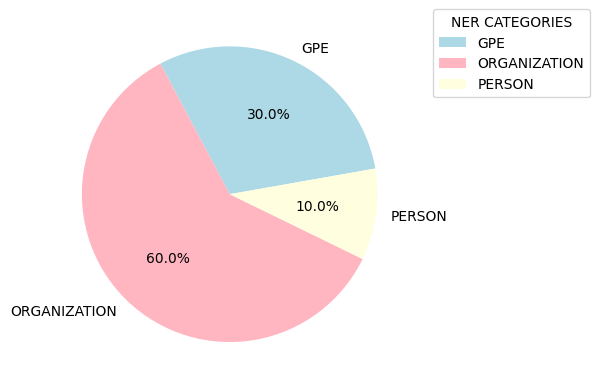

In [ ]:
labels = list(ner_categories.keys())
values = [ner_categories.get(list) for list in labels]
mycolors = ["lightblue", "lightpink", "lightyellow"]
plt.pie(values,labels=labels, colors = mycolors, autopct='%1.1f%%', startangle=10)

plt.legend(title = "NER CATEGORIES", bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
